# Bài tập 6 - Seam carving
Các em cài đặt thuật toán Seam Carving theo bài báo sau: https://perso.crans.org/frenoy/matlab2012/seamcarving.pdf

Input: Ảnh bất kỳ. Kích thước sẽ giảm D (pixel) theo chiều dọc.

Output: Ảnh sau khi giảm kích thước D (pixel) theo chiều dọc.

**Testcase minh họa:**

Input: D=200 và ảnh đầu vào như sau:

In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

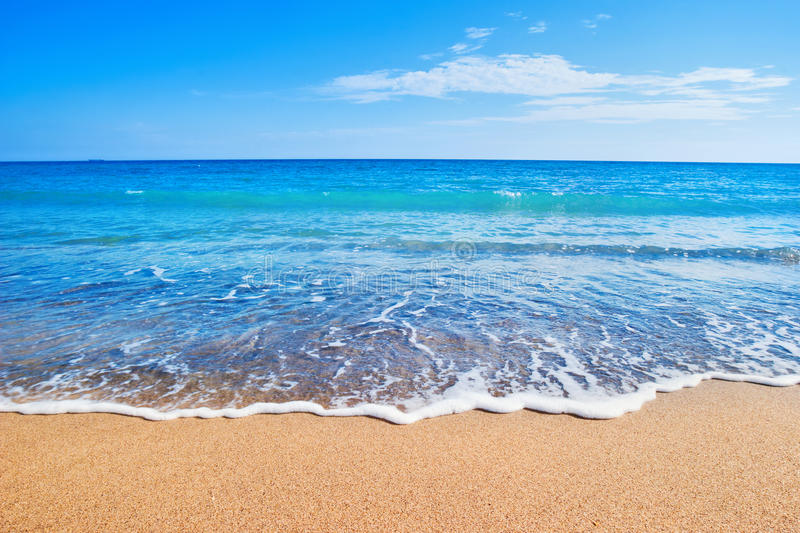

Output: 

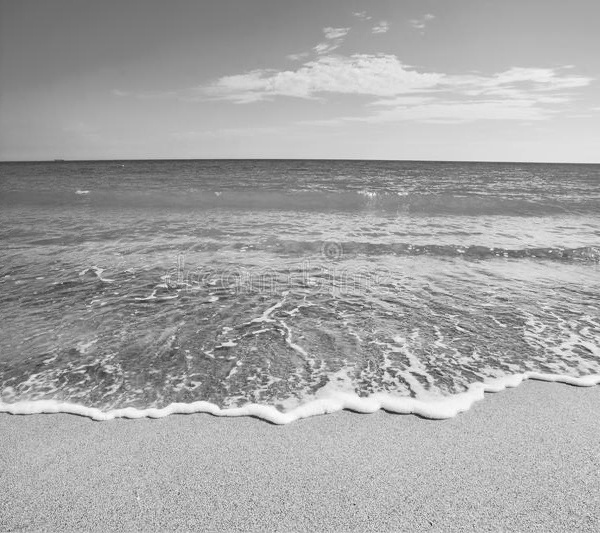

In [35]:
%cd /content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai6

/content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai6


In [36]:
import numpy as np
from numpy import sqrt
import cv2
import matplotlib.pyplot as plt

In [37]:
# Buoc 1: Tinh energy cua anh
def calc_energy(arr):
    # 1. tinh dao ham theo truc x
    # 2. tinh dao ham theo truc y
    # 3. tinh energy dua vao thong tin dao ham
    ### BEGIN SOLUTION
    derivative_x = np.concatenate((arr[:, 1:], np.zeros((arr.shape[0], 1))), axis=1) - arr
    derivative_y = np.concatenate((arr[1:, :], np.zeros((1, arr.shape[1]))), axis=0) - arr
    energy_matrix = sqrt(derivative_x **2 + derivative_y **2)
    ### END SOLUTION
    return energy_matrix


Tìm đường seam và xóa theo thuật toán sau: 
1. Tìm vị trí có giá trị min của hàng cuối cùng. Đó là 1 thành phần của đường seam cần tìm. Giả sử là vị trí i.
2. Xét hàng liền kề phía trên, pixel nằm trên đường seam là vị trí min của (i-1, i, i + 1). Lặp lại bước này đến khi duyệt đến hàng đầu tiên.
3. Xóa các pixel nằm trên đường seam vừa tìm được.

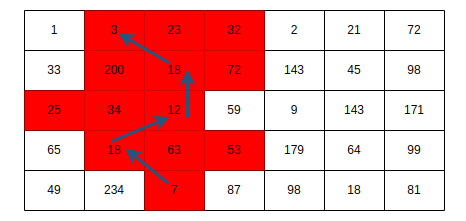

In [38]:
# Buoc 2: tim duong seam va xoa
def find_seam_carving(energy, arr):
    # 1. Tim vi tri min hang cuoi cung
    # 2. Tim vi tri min cac hang phia tren (vi tri i-1:i+1)
    # 3. xoa cac gia tri tren duong seam tim duoc
    ### BEGIN SOLUTION
    list_index = []
    # 1. Tim vi tri min hang cuoi cung
    list_index.append(np.argmin(energy[-1, :]))

    # 2. Tim vi tri min cac hang phia tren (vi tri i-1:i+1)
    for i in range(energy.shape[0] - 2, -1, -1):
        list_index.append(list_index[-1] -1 + np.argmin(energy[i, list_index[-1] -1: list_index[-1] + 2]))

    # 3. Dieu chinh lai vi tri list_index phu hop voi anh goc
    list_index = [x - 1 for x in list_index]
    list_index.reverse()

    # 4. xoa cac gia tri tren duong seam tim duoc
    m,n = arr.shape
    arr = arr[np.arange(n) != np.array(list_index)[:,None]].reshape(m,-1)
    ### END SOLUTION
    # tra ve anh da duoc xoa 1 duong seam
    return arr

In [39]:
def sol(img_path, num_pixel):
    arr = cv2.imread(img_path, 0)

    for i in range(num_pixel):
        # 1. Tinh dao ham
        energy = calc_energy(arr)

        # 2. Them le trai, phai gia tri 999999 vao anh de de tinh toan
        energy = np.concatenate((np.full((energy.shape[0], 1), 99999), energy), axis=1)
        energy = np.concatenate((energy, np.full((energy.shape[0], 1), 99999)), axis=1)

        # 3. Tim duong seam va xoa
        arr = find_seam_carving(energy, arr)

    return arr

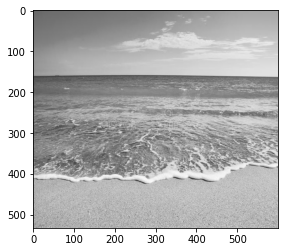

In [40]:
# test trên testcase mẫu
arr = sol('beach.jpg', 200)
plt.imshow(cv2.cvtColor(arr, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
# cham diem tren testcase mau
def evaluate(img1, img2):
  img1 = img1.astype(np.int16)
  img2 = img2.astype(np.int16)
  return np.mean(np.abs(img1 - img2))/255. < 0.01
  

testcase = cv2.imread('result_testcase.jpg', 0)

assert evaluate(testcase, arr)

In [42]:
### BEGIN HIDDEN TESTS
def calc_energy_for_test(arr):
    derivative_x = np.concatenate((arr[:, 1:], np.zeros((arr.shape[0], 1))), axis=1) - arr
    derivative_y = np.concatenate((arr[1:, :], np.zeros((1, arr.shape[1]))), axis=0) - arr
    energy_matrix = sqrt(derivative_x **2 + derivative_y **2)
    return energy_matrix

def find_seam_carving_for_test(energy, arr):
    list_index = []
    # 1. Tim vi tri min hang cuoi cung
    list_index.append(np.argmin(energy[-1, :]))

    # 2. Tim vi tri min cac hang phia tren (vi tri i-1:i+1)
    for i in range(energy.shape[0] - 2, -1, -1):
        list_index.append(list_index[-1] -1 + np.argmin(energy[i, list_index[-1] -1: list_index[-1] + 2]))

    # 3. Dieu chinh lai vi tri list_index phu hop voi anh goc
    list_index = [x - 1 for x in list_index]
    list_index.reverse()

    # 4. xoa cac gia tri tren duong seam tim duoc
    m,n = arr.shape
    arr = arr[np.arange(n) != np.array(list_index)[:,None]].reshape(m,-1)
    # tra ve anh da duoc xoa 1 duong seam
    return arr

def sol_for_test(img_path, num_pixel):
    arr = cv2.imread(img_path, 0)

    for i in range(num_pixel):
        # 1. Tinh dao ham
        energy = calc_energy_for_test(arr)

        # 2. Them le trai, phai gia tri 999999 vao anh de de tinh toan
        energy = np.concatenate((np.full((energy.shape[0], 1), 99999), energy), axis=1)
        energy = np.concatenate((energy, np.full((energy.shape[0], 1), 99999)), axis=1)

        # 3. Tim duong seam va xoa
        arr = find_seam_carving(energy, arr)

    return arr

assert np.all(sol('beach.jpg', 200) == sol_for_test('beach.jpg', 200))
### END HIDDEN TESTS